In [1]:
import pandas as pd

In [10]:
ms = pd.read_csv(r"C:\Users\96181\Desktop\ML-project2.0\masculinity.csv")
ms.head()
#print(ms.value_counts())

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [11]:
ms.isnull().sum()

Unnamed: 0     0
StartDate      0
EndDate        0
q0001          0
q0002          0
              ..
educ4          1
age3           1
kids           6
orientation    1
weight         1
Length: 98, dtype: int64

In [21]:
ms = ms.dropna()
ms = ms.drop(columns = ['Unnamed: 0', 'StartDate','EndDate'])
ms.dtypes

q0001           object
q0002           object
q0004_0001      object
q0004_0002      object
q0004_0003      object
                ...   
educ4           object
age3            object
kids            object
orientation     object
weight         float64
Length: 95, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ms.columns:
    if ms[col].dtypes == 'object':
        ms[col] = le.fit_transform(ms[col].astype(str))

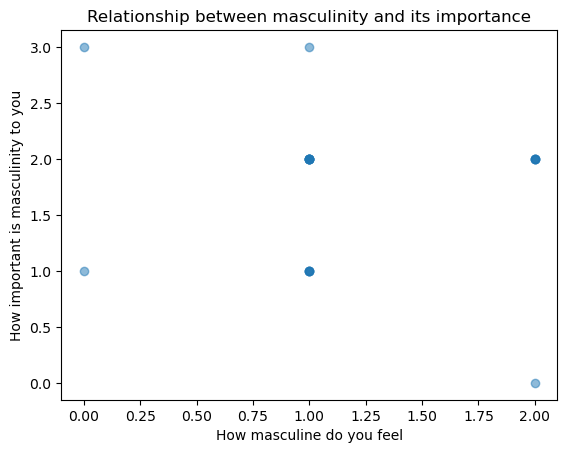

In [27]:
import matplotlib.pyplot as plt
x = ms['q0001']
y = ms['q0002']

plt.scatter(x, y, alpha=0.5)
plt.xlabel("How masculine do you feel")
plt.ylabel("How important is masculinity to you")
plt.title("Relationship between masculinity and its importance")

plt.show()

In [31]:
selected_features = ["q0001", "q0002", "q0005", "age3", "educ4"]
ms_subset = ms[selected_features]
ms = ms_subset.dropna()

In [56]:
from sklearn.cluster import KMeans
x = ms_subset
ml = KMeans(n_clusters = 3, random_state = 39)
ml.fit(x)

C:\Users\96181\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=39)

In [57]:
labels = ml.labels_
cluster_0 = []
cluster_1 = []
cluster_2 = []

for i, label in enumerate(labels):
    if label == 0:
        cluster_0.append(x.index[i])
    elif label == 1:
        cluster_1.append(x.index[i])
    elif label == 2:
        cluster_2.append(x.index[i])

ms_cluster_0 = ms.loc[cluster_0]
ms_cluster_1 = ms.loc[cluster_1]
ms_cluster_2 = ms.loc[cluster_2]


In [58]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.22537319311711568


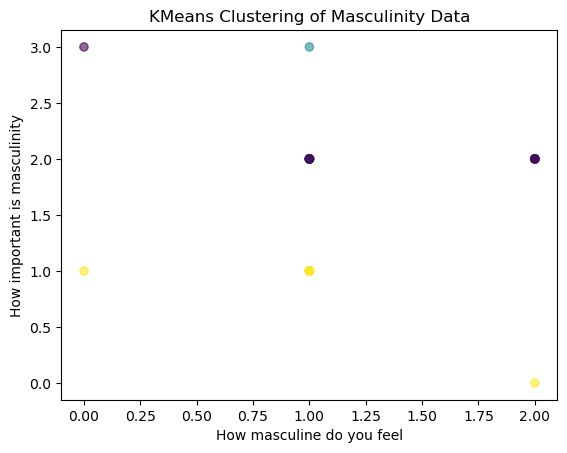

In [59]:
import matplotlib.pyplot as plt

plt.scatter(
    ms.loc[x.index, 'q0001'],
    ms.loc[x.index, 'q0002'],
    c=labels,     
    alpha=0.6
)

plt.xlabel("How masculine do you feel")
plt.ylabel("How important is masculinity")
plt.title("KMeans Clustering of Masculinity Data")
plt.show()


In [60]:
ms['cluster'].value_counts()
ms.groupby('cluster').mean()


,q0001,q0002,q0005,age3,educ4
cluster,,,,,
0.0,1.333333,2.111111,0.555556,0.888889,0.222222
1.0,1.142857,2.142857,0.571429,1.142857,1.571429
2.0,1.000000,0.857143,0.428571,1.000000,0.000000
